## Análisis de lluvias monocromaticas de Proton

El set de simulaciones esta compuesto por 1000 lluvias verticales de Proton de 10GeV, 100GeV y 1000GeV.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pylab
import os

In [2]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/rpc-wcd/")
os.getcwd()

'/home/csarmiento/Documentos/rpc-wcd'

#### observables de los primarios

In [3]:
# 10 GeV
#
df10= pd.read_csv(r"rbm_10GeV_P/901000.pri", delimiter=" ")
df10.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,14,10.0,-16.9521,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,14,10.0,-25.5748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14,10.0,-17.0986,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,14,10.0,-28.4414,0.0,0.0,0.0,0.0,1.0,1.0,2.0
4,14,10.0,-22.6756,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 100 GeV
#
df100= pd.read_csv(r"rbm_100GeV_P/910000.pri", delimiter=" ")
df100.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,14,100.0,-12.2310,0.0,0.0,111.0,15.0,6.0,4.0,136.0
1,14,100.0,-20.3995,0.0,0.0,91.0,1.0,1.0,4.0,97.0
2,14,100.0,-31.0161,0.0,0.0,17.0,0.0,1.0,4.0,22.0
3,14,100.0,-32.8717,0.0,0.0,154.0,20.0,2.0,10.0,186.0
4,14,100.0,-22.1942,0.0,0.0,22.0,0.0,0.0,3.0,25.0


In [5]:
# 1000 GeV
#
df1000= pd.read_csv(r"rbm_1000GeV_P/999900.pri", delimiter=" ")
df1000.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,14,1000.0,-18.8599,0.0,0.0,3424.0,381.0,13.0,21.0,3839.0
1,14,1000.0,-17.6363,0.0,0.0,923.0,113.0,3.0,25.0,1064.0
2,14,1000.0,-32.5641,0.0,0.0,280.0,31.0,5.0,17.0,333.0
3,14,1000.0,-33.8627,0.0,0.0,298.0,27.0,0.0,13.0,338.0
4,14,1000.0,-28.2819,0.0,0.0,714.0,76.0,6.0,21.0,817.0


#### Punto de primera interacción

En estas graficas se muestran los histogramas para 1000 lluvias de Proton.

Como se puede ver los primarios con E=10GeV no logran penetrar la atmosfera sin interactuar hasta el punto
de observación. Ubicado a 5100 m s.n.m. De otra parte Algunos primarios de 100 GeV y 1000 GeV llegan al piso
sin interactuar.

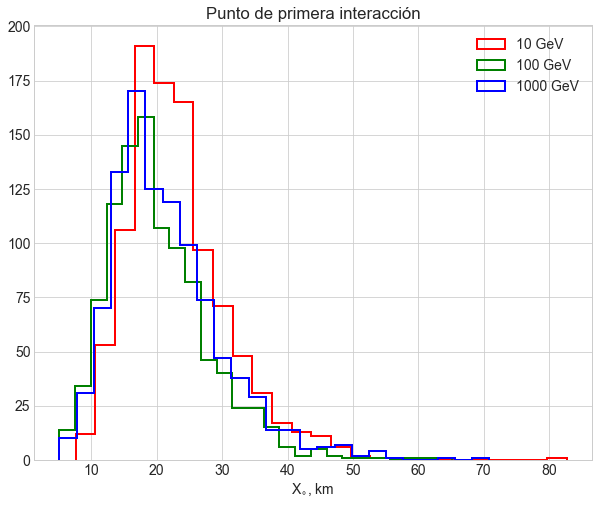

In [6]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="r", linewidth=2, fill=False, label="10 GeV");
plt.hist(-df100["prm_x0"], bins=25, histtype='step', color="g", linewidth=2, fill=False, label="100 GeV");
plt.hist(-df1000["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="1000 GeV");
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
plt.legend()
plt.show()

La siguiente figura muestra un zoom enla zona entre 4 km y 20 km.

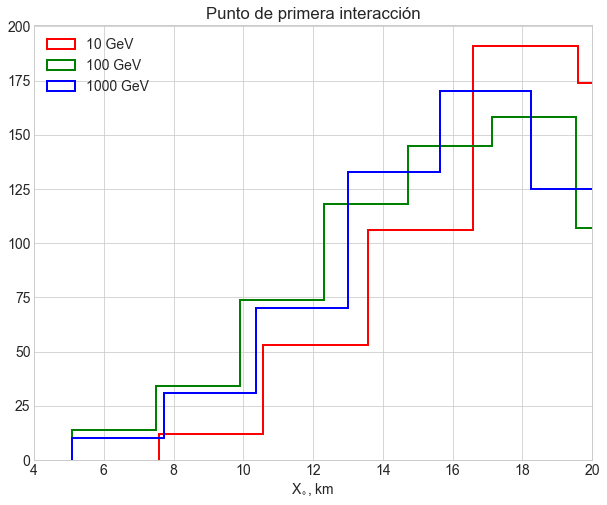

In [7]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="r", linewidth=2, fill=False, label="10 GeV");
plt.hist(-df100["prm_x0"], bins=25, histtype='step', color="g", linewidth=2, fill=False, label="100 GeV");
plt.hist(-df1000["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="1000 GeV");
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
plt.xlim(4, 20)
plt.legend()
plt.show()

## Búsqueda de primarios sin interacción

La idea entonces es ubicar los primarios que llegaron sin interactuar y aquellos cuyo punto de
interacción es muy cercano al punto de observación.

    -> E=100 GeV se hallaron 3 eventos.
    -> E=1000 GeV se hallaron 5 eventos.

###  Protones que llegan sin interactuar -> 100 GeV

In [110]:
df100_ = df100[-df100["prm_x0"]<6]
df100_.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
64,14,100.0,-5.10000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
91,14,100.0,-5.10000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
565,14,100.0,-5.75528,0.0,0.0,132.0,30.0,4.0,8.0,174.0


In [111]:
ds100= pd.read_csv(r"rbm_100GeV_P/910000.sec", delimiter=" ")
ds100.head()

/home/csarmiento/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,3,4,5,7,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
0,2,0.00589323,-0.001657,0.0164038,220792,-125047,371978.0,1,14,100.0,0,0.0
1,1,-6.83472e-05,0.000900,0.000765967,211448,-98228.8,372349.0,1,14,100.0,0,0.0
2,1,0.000317792,-0.000080,0.000205408,220454,-129904,372000.0,1,14,100.0,0,0.0
3,1,0.00339798,-0.001021,0.00872659,218563,-128081,371950.0,1,14,100.0,0,0.0
4,1,0.000169758,-0.000055,0.00045778,218481,-128102,371949.0,1,14,100.0,0,0.0


In [112]:
ds100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122170 entries, 0 to 122169
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CorsikaId   122170 non-null  object 
 1   px          122170 non-null  object 
 2   py          122170 non-null  float64
 3   pz          122170 non-null  object 
 4   x           122170 non-null  object 
 5   y           122170 non-null  object 
 6   t           122170 non-null  float64
 7   shower_id   122170 non-null  object 
 8   prm_id      122170 non-null  object 
 9   prm_energy  122170 non-null  float64
 10  prm_theta   122170 non-null  object 
 11  prm_phi     122169 non-null  float64
dtypes: float64(4), object(8)
memory usage: 11.2+ MB


In [115]:
#Conversión de string a float de algunas variables
#
ds100['CorsikaId'] = pd.to_numeric(ds100['CorsikaId'],errors='coerce')
ds100['shower_id'] = pd.to_numeric(ds100['shower_id'],errors='coerce')
ds100['x'] = pd.to_numeric(ds100['x'],errors='coerce')
ds100['y'] = pd.to_numeric(ds100['y'],errors='coerce')

ds100['px'] = pd.to_numeric(ds100['px'],errors='coerce')
ds100['py'] = pd.to_numeric(ds100['py'],errors='coerce')
ds100['pz'] = pd.to_numeric(ds100['pz'],errors='coerce')

ds100['x'] = ds100['x']/100
ds100['y'] = ds100['y']/100

In [116]:
ds100_ = ds100[ds100["shower_id"]==566]
ds100_.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
67195,13.0,1.386160,0.344554,3.367680,260.8010,-428.987,370851.0,566.0,0014,100.0,+00.000,0.0
67196,6.0,0.217554,0.081417,3.458890,41.0502,-471.071,370606.0,566.0,0014,100.0,+00.000,0.0
67197,5.0,-0.332559,-0.210466,0.920977,-234.2130,-628.458,370796.0,566.0,0014,100.0,+00.000,0.0
67198,1.0,-0.000104,0.001114,0.000513,-144.4820,-344.340,371229.0,566.0,0014,100.0,+00.000,0.0
67199,13.0,0.089547,0.014075,1.019910,20.4339,-493.930,371046.0,566.0,0014,100.0,+00.000,0.0


In [117]:
ds100_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 67195 to 67368
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CorsikaId   174 non-null    float64
 1   px          174 non-null    float64
 2   py          174 non-null    float64
 3   pz          174 non-null    float64
 4   x           174 non-null    float64
 5   y           174 non-null    float64
 6   t           174 non-null    float64
 7   shower_id   174 non-null    float64
 8   prm_id      174 non-null    object 
 9   prm_energy  174 non-null    float64
 10  prm_theta   174 non-null    object 
 11  prm_phi     174 non-null    float64
dtypes: float64(10), object(2)
memory usage: 17.7+ KB


In [118]:
E100 = np.sqrt(ds100_["px"]**2 + ds100_["py"]**2 + ds100_["pz"]**2)

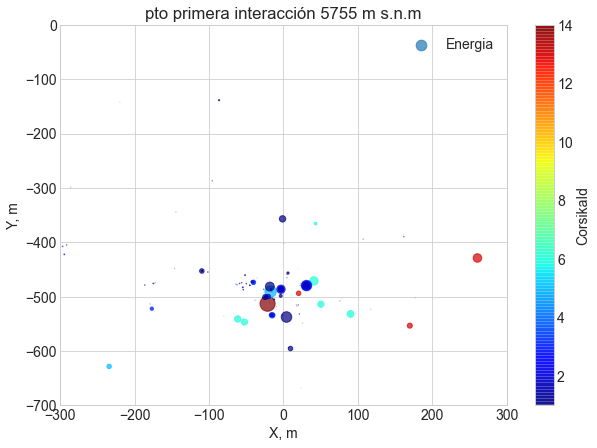

In [122]:
ds100_.plot(kind="scatter", x="x", y="y", alpha=0.7,
    s=E100*20, label="Energia", figsize=(10,7),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.xlabel("X, m")
plt.ylabel("Y, m")
plt.xlim(-300, 300)
plt.ylim(-700, 0)
plt.title("pto primera interacción 5755 m s.n.m")
plt.legend()

In [123]:
ds100_32 = ds100[ds100["shower_id"]==8]
E32 = np.sqrt(ds100_32["px"]**2 + ds100_32["py"]**2 + ds100_32["pz"]**2)

In [124]:
ds100_32.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
636,1.0,0.000036,-0.000077,0.000078,508.719,-1315.8500,371431.0,8.0,14,100.0,0,0.0
637,5.0,0.197766,0.154900,3.467580,297.046,-53.9485,370665.0,8.0,14,100.0,0,0.0
638,6.0,0.456970,0.104988,0.809731,3812.580,917.8610,374138.0,8.0,14,100.0,0,0.0
639,13.0,0.143635,0.241672,0.303811,1684.820,1889.3600,384609.0,8.0,14,100.0,0,0.0
640,1.0,0.000015,0.001069,0.000385,-1271.910,410.5230,372623.0,8.0,14,100.0,0,0.0


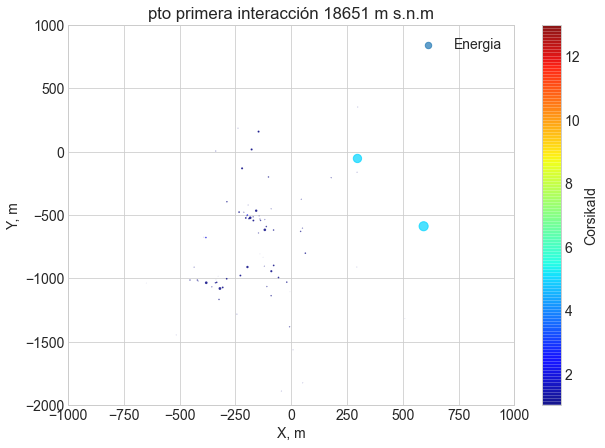

In [127]:
ds100_32.plot(kind="scatter", x="x", y="y", alpha=0.7,
    s=E32*20, label="Energia", figsize=(10,7),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title("pto primera interacción 18651 m s.n.m")
plt.xlabel("X, m")
plt.ylabel("Y, m")
plt.xlim(-1000, 1000)
plt.ylim(-2000, 1000)
plt.legend()

###  Protones que llegan sin interactuar -> 1000 GeV

In [128]:
df1000_ = df1000[-df1000["prm_x0"]<6]
df1000_.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
85,14,1000.0,-5.10000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
318,14,1000.0,-5.39143,0.0,0.0,102.0,27.0,17.0,12.0,158.0
477,14,1000.0,-5.10000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
556,14,1000.0,-5.10000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
734,14,1000.0,-5.10000,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [129]:
df1000_.shape

(5, 10)

In [130]:
ds1000= pd.read_csv(r"rbm_1000GeV_P/999900.sec", delimiter=" ")
ds1000.head()

/home/csarmiento/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,3,4,5,7,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
0,5,0.123531,0.063572,0.332881,142262,227589,373009.0,1,14,1000.0,0,0.0
1,1,0.000770182,0.000070,0.000412617,72091.4,146618,371300.0,1,14,1000.0,0,0.0
2,1,0.00402838,-0.002069,0.0598651,17282.2,33962.2,370622.0,1,14,1000.0,0,0.0
3,1,-0.000105908,-0.000119,0.00131341,97776.5,-69763.9,370871.0,1,14,1000.0,0,0.0
4,1,0.00327029,-0.002121,0.0127039,158611,-86836.4,371194.0,1,14,1000.0,0,0.0


In [131]:
#Conversión de string a float de algunas variables
#
ds1000['CorsikaId'] = pd.to_numeric(ds1000['CorsikaId'],errors='coerce')
ds1000['shower_id'] = pd.to_numeric(ds1000['shower_id'],errors='coerce')
ds1000['x'] = pd.to_numeric(ds1000['x'],errors='coerce')
ds1000['y'] = pd.to_numeric(ds1000['y'],errors='coerce')

ds1000['px'] = pd.to_numeric(ds1000['px'],errors='coerce')
ds1000['py'] = pd.to_numeric(ds1000['py'],errors='coerce')
ds1000['pz'] = pd.to_numeric(ds1000['pz'],errors='coerce')

ds1000['x'] = ds1000['x']/100
ds1000['y'] = ds1000['y']/100

In [132]:
ds1000_13 = ds1000[ds1000["shower_id"]==319]
E13 = np.sqrt(ds1000_13["px"]**2 + ds1000_13["py"]**2 + ds1000_13["pz"]**2)

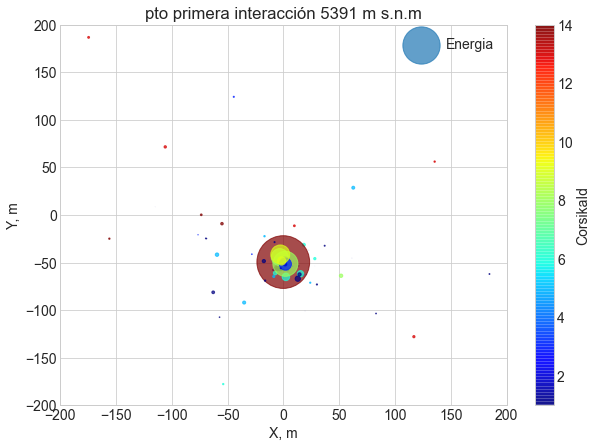

In [133]:
ds1000_13.plot(kind="scatter", x="x", y="y", alpha=0.7,
    s=E13*5, label="Energia", figsize=(10,7),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title("pto primera interacción 5391 m s.n.m")
plt.xlabel("X, m")
plt.ylabel("Y, m")
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.legend()

(-100.0, 0.0)

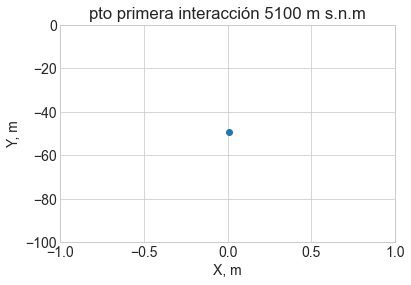

In [134]:
ds1000_86 = ds1000[ds1000["shower_id"]==86]
plt.plot(ds1000_86["x"], ds1000_86["y"], 'o' )
plt.title("pto primera interacción 5100 m s.n.m")
plt.xlabel("X, m")
plt.ylabel("Y, m")
plt.xlim(-1, 1)
plt.ylim(-100, 0)

In [135]:
ds1000_86.head()

,CorsikaId,px,py,pz,x,y,t,shower_id,prm_id,prm_energy,prm_theta,prm_phi
173358,14.0,0.000129,-0.893335,998.094,0.006801,-49.2844,370577.0,86.0,14,1000.0,0,0.0
